In [167]:
import pandas as pd
import numpy as np
#import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

train_df = pd.read_csv(r'C:\Users\grety\Desktop\Git_Hub\Repositories\final-project\Resources\trainn.csv')
train_df.head(5)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [168]:
test_df = pd.read_csv(r'C:\Users\grety\Desktop\Git_Hub\Repositories\final-project\Resources\testt.csv')
test_df.head(5)

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [169]:
test_df.drop(['ID'],axis=1,inplace=True)
test_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [171]:
# Shape of dataset
print("Shape of Training dataset:", train_df.shape)

#Shape of Training dataset: (333, 15)
# Checking null values for training dataset
train_df.isnull().sum()

Shape of Training dataset: (333, 15)


ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [172]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [173]:
train_df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [174]:
train_df.drop(['ID'],axis=1,inplace=True)

In [175]:
# Finding out the correlation between the features
corr = train_df.corr()
corr.shape

(14, 14)

<AxesSubplot:>

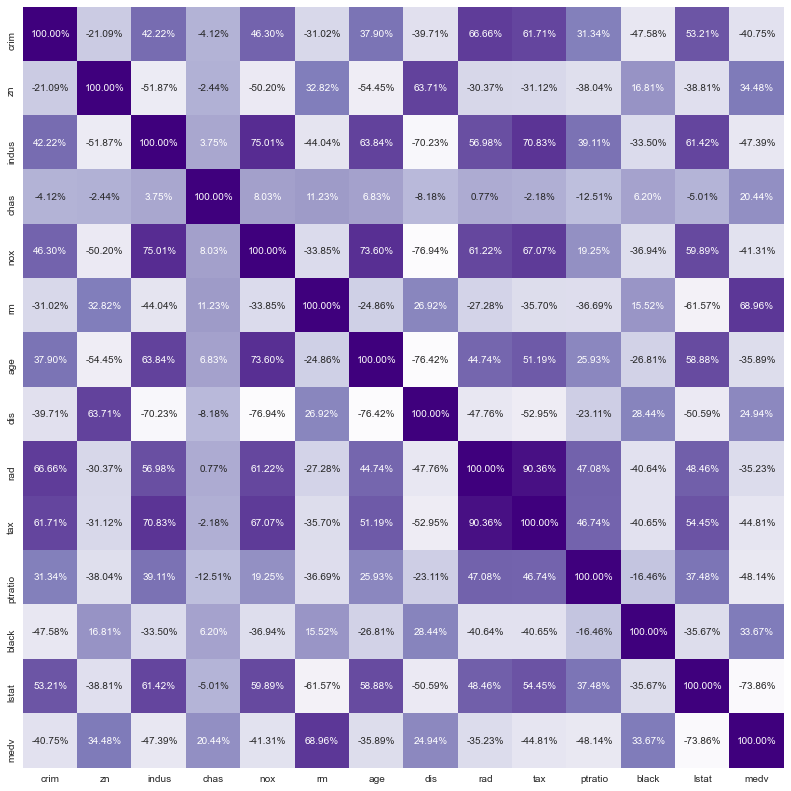

In [176]:
# Plotting the heatmap of correlation between features
import seaborn as sns
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square= True, fmt=".2%", annot=True, cmap="Purples")

<AxesSubplot:>

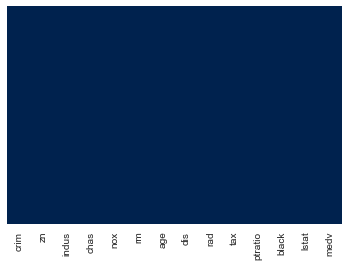

In [177]:
# Checking the null values using heatmap
# There is any null values are occupyed here
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='cividis')

<AxesSubplot:xlabel='rad', ylabel='count'>

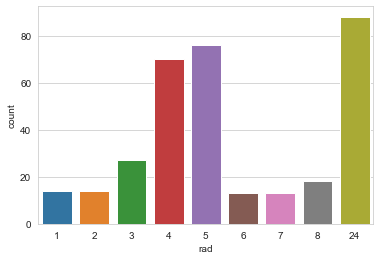

In [178]:
sns.set_style('whitegrid')
sns.countplot(x='rad',data=train_df)

<AxesSubplot:xlabel='chas', ylabel='count'>

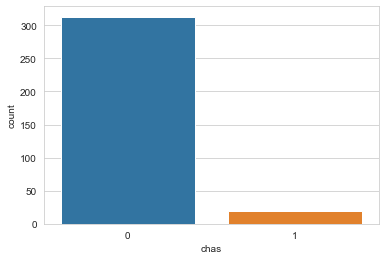

In [179]:
sns.set_style('whitegrid')
sns.countplot(x='chas',data=train_df)

<AxesSubplot:xlabel='chas', ylabel='count'>

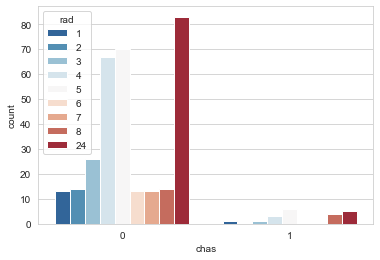

In [180]:
sns.set_style('whitegrid')
sns.countplot(x='chas',hue='rad',data=train_df,palette='RdBu_r')

C:\Users\grety\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

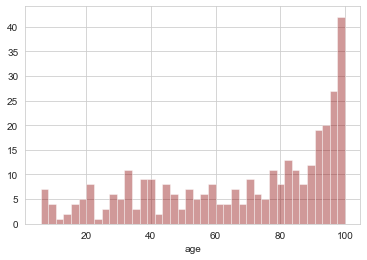

In [181]:
sns.distplot(train_df['age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:xlabel='crim'>

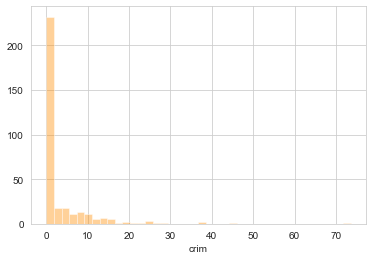

In [182]:
sns.distplot(train_df['crim'].dropna(),kde=False,color='darkorange',bins=40)

<AxesSubplot:xlabel='rm'>

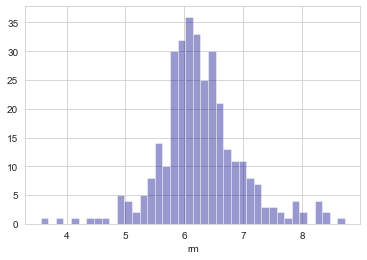

In [183]:
sns.distplot(train_df['rm'].dropna(),kde=False,color='darkblue',bins=40)

In [184]:
# Lets try to understand which are important features for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = train_df.iloc[:,0:13] #independent columns
y = train_df.iloc[:,-1] #target column i.e price range

In [185]:
y = np.round(train_df["medv"])
#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ["Specs","Score"] #naming the dataframe columns
featureScores

,Specs,Score
0,crim,3251.396750
1,zn,4193.279045
2,indus,618.607714
3,chas,49.220803
4,nox,3.292260
5,rm,14.620403
6,age,1659.128989
7,dis,106.642659
8,rad,879.520751
9,tax,9441.032032


In [186]:
print(featureScores.nlargest(5,"Score")) #print 5 best features

    Specs        Score
9     tax  9441.032032
1      zn  4193.279045
0    crim  3251.396750
11  black  2440.426651
6     age  1659.128989


In [187]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [188]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.11603849 0.02491527 0.04695086 0.01419226 0.07246188 0.13291843
 0.11934315 0.10494486 0.03659596 0.04686273 0.04830274 0.102317
 0.13415637]


In [189]:
X_train.columns


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

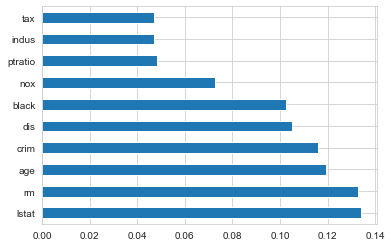

In [190]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind="barh")
plt.show()

In [196]:
# Model Fitting
## Linear Regression

#values assigning
X = train_df.iloc[:,0:13] 
y = train_df.iloc[:,-1]

#X_test = test_df.iloc[:,0:13] 
#y_test = test_df.iloc[:,-1]

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0)

In [198]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [199]:
y_pred = model.predict(X_train)
print("Training Accuracy:", model.score(X_train, y_train)*100)

Training Accuracy: 72.93455672581774


In [200]:
# Train Accuracy Score Prediction

print("Testing Accuracy:", model.score(X_test, y_test)*100)

Testing Accuracy: 73.12411054098584


In [201]:
from sklearn.metrics import mean_squared_error, r2_score
print("Model Accuracy:", r2_score(y, model.predict(X))*100)

Model Accuracy: 72.99823346258343


<function matplotlib.pyplot.show(close=None, block=None)>

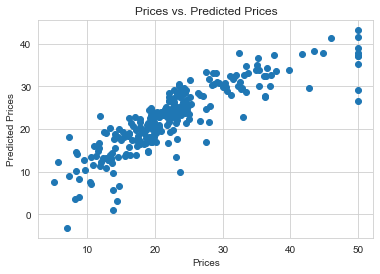

In [202]:
# Model Prediction Visualization
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs. Predicted Prices")
plt.show

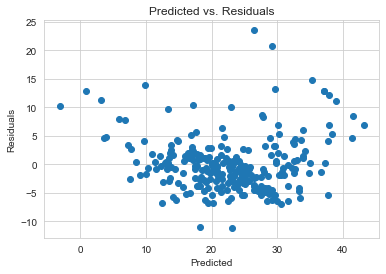

In [203]:
# Checking Residuals
plt.scatter(y_pred, y_train-y_pred)
plt.title("Predicted vs. Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

C:\Users\grety\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


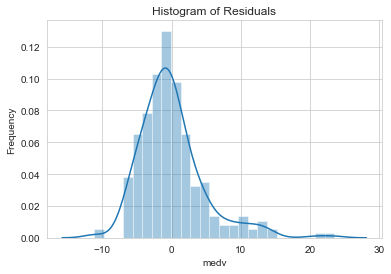

In [204]:
# Checking Normality of Errors

sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.ylabel("Frequency")
plt.show()

In [205]:
# Random Forest Regressor - MEDV, RM, PTRATIO, NOX, TAX
X = train_df.iloc[:,[-1,5,10,4,9]]
y = train_df.iloc[:,[-1]]

In [206]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [207]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

C:\Users\grety\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [208]:
y_pred = reg.predict(X_train)

In [209]:
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 99.98982227807852


In [210]:
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 99.8939328386734


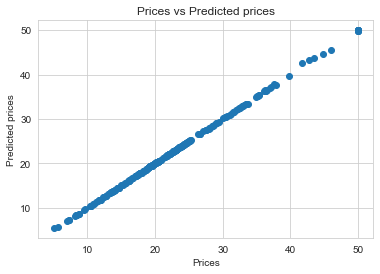

In [211]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [212]:
# Random Forest Regressor 2 - all 14 features
X = train_df.iloc[:,0:13]
y = train_df.iloc[:,[-1]]


In [213]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [214]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

C:\Users\grety\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [215]:
y_pred1 = reg.predict(X_train)

In [216]:
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 97.26371096840823


In [217]:
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 90.41888409934529


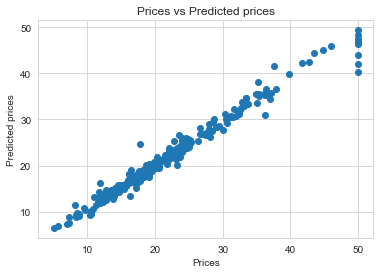

In [218]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred1)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [219]:
# Random Forest Regressor 3 - MEDV, INDUS, AGE, RAD, DIS
X = train_df.iloc[:,[-1,2,6,8,7]]
y = train_df.iloc[:,[-1]]

In [220]:
#from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [221]:
#from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

C:\Users\grety\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [222]:
y_pred2 = reg.predict(X_train)

In [223]:
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 99.98809748281067


In [224]:
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 99.90439060054898


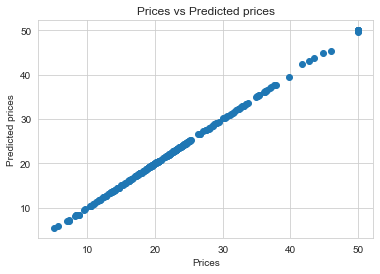

In [225]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred2)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [226]:
# Random Forest Regressor 3 - TAX, ZN, CRIME, BLACK, AGE
X = train_df.iloc[:,[9,1,0,11,6]]
y = train_df.iloc[:,[-1]]

In [227]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [228]:
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

C:\Users\grety\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor()

In [229]:
y_pred3 = reg.predict(X_train)

In [230]:
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 90.55412850913497


In [231]:
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 44.03001087566763


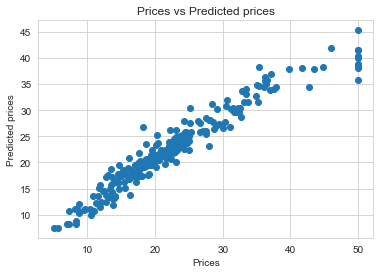

In [232]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred3)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()